# Funciones de distribución de probabilidades
## Distribución Uniforme

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([ 99719.,  99306., 100018., 100270.,  99738.,  99822., 100551.,
        100133., 100730.,  99713.]),
 array([ 1.0002058 , 10.90017752, 20.80014924, 30.70012095, 40.60009267,
        50.50006439, 60.40003611, 70.30000783, 80.19997955, 90.09995127,
        99.99992299]),
 <a list of 10 Patch objects>)

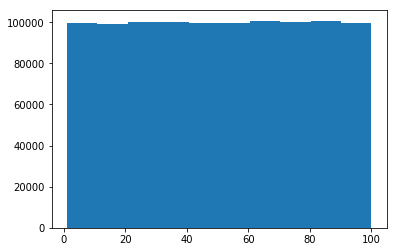

In [13]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [14]:
data = np.random.randn(1000000)

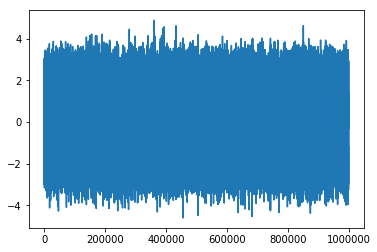

In [15]:
x = range(1, 1000001)
plt.plot(x, data)

(array([1.42000e+02, 3.24900e+03, 3.62560e+04, 1.70749e+05, 3.48219e+05,
        3.05490e+05, 1.15569e+05, 1.89430e+04, 1.35500e+03, 2.80000e+01]),
 array([-4.59884826, -3.65004016, -2.70123206, -1.75242396, -0.80361586,
         0.14519224,  1.09400034,  2.04280844,  2.99161654,  3.94042464,
         4.88923274]),
 <a list of 10 Patch objects>)

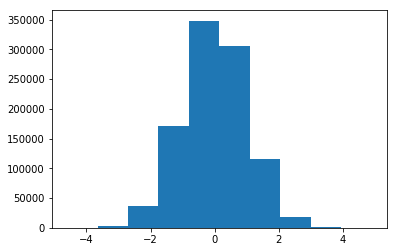

In [16]:
%matplotlib inline
plt.hist(data)

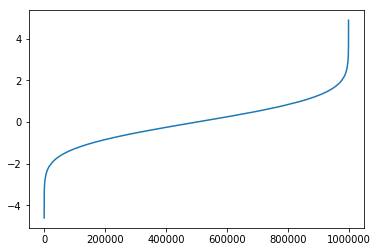

In [17]:
plt.plot(x,sorted(data))

(array([  37.,  178.,  733., 1757., 2596., 2475., 1503.,  573.,  131.,
          17.]),
 array([-2.95395707, -1.2209733 ,  0.51201047,  2.24499423,  3.977978  ,
         5.71096177,  7.44394553,  9.1769293 , 10.90991306, 12.64289683,
        14.3758806 ]),
 <a list of 10 Patch objects>)

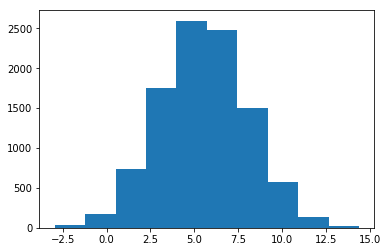

In [18]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd*Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [19]:
data = np.random.randn(2,4)
data

array([[-0.67040353, -0.47641143, -0.12611364, -1.35630124],
       [-0.2773856 , -0.33578169,  1.10606222,  0.76691794]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [22]:
def pi_montecarlo(n, n_exp): # Calcula π utilizando el método de Montecarlo
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp): # Calcula los valores de pi n_exp veces y los guarda en una lista
        value = 0
        x = np.random.uniform(0, 1, n).tolist()
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n): # Calcula el níumero de veces en que z está dentro del círculo
            z = np.sqrt(x[j]*x[j] + y[j]*y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
        
    pi = pi_avg/n_exp
    
    print(pi)
    fig = plt.plot(pi_value_list)
    return(pi, fig)

3.1400471999999997


(3.1400471999999997, [<matplotlib.lines.Line2D at 0x165d9782a20>])

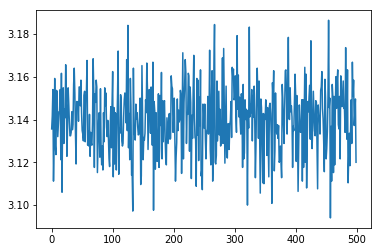

In [24]:
pi_montecarlo(10000, 500)

### Dummy Data Sets

In [25]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [26]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000441,1.499274,18.511839
std,1.000230,2.503063,7.796235
min,-4.961394,-10.657256,5.000005
25%,-0.675747,-0.186608,11.763053
50%,0.000136,1.499389,18.508228
75%,0.672476,3.187130,25.275538
max,5.092508,13.390915,32.000000


(array([5.20000e+01, 1.54800e+03, 2.44450e+04, 1.47775e+05, 3.52476e+05,
        3.31722e+05, 1.23024e+05, 1.79870e+04, 9.50000e+02, 2.10000e+01]),
 array([-4.9613942 , -3.956004  , -2.95061381, -1.94522362, -0.93983342,
         0.06555677,  1.07094696,  2.07633716,  3.08172735,  4.08711754,
         5.09250774]),
 <a list of 10 Patch objects>)

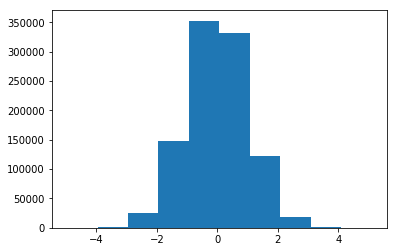

In [27]:
plt.hist(data["A"])

(array([5.90000e+01, 1.59400e+03, 2.25920e+04, 1.31441e+05, 3.23026e+05,
        3.39280e+05, 1.51242e+05, 2.84890e+04, 2.20500e+03, 7.20000e+01]),
 array([-10.65725609,  -8.25243897,  -5.84762185,  -3.44280473,
         -1.03798761,   1.36682951,   3.77164663,   6.17646375,
          8.58128087,  10.98609799,  13.39091512]),
 <a list of 10 Patch objects>)

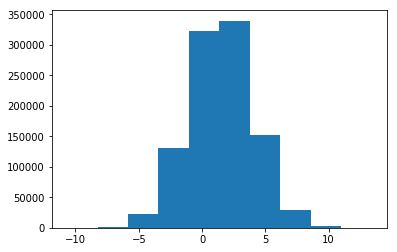

In [28]:
plt.hist(data["B"])

(array([ 99813.,  99711., 100162.,  99946., 100078.,  99583.,  99867.,
        100274., 100356., 100210.]),
 array([ 5.00000544,  7.70000486, 10.40000428, 13.1000037 , 15.80000312,
        18.50000254, 21.20000196, 23.90000138, 26.6000008 , 29.30000022,
        31.99999964]),
 <a list of 10 Patch objects>)

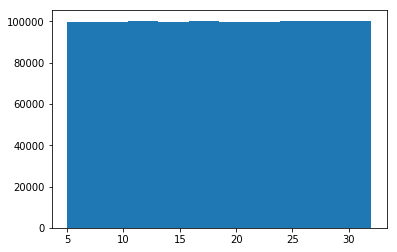

In [29]:
plt.hist(data["C"])

In [30]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [31]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [37]:
column_names = data.columns.values.tolist()

In [38]:
a = len(column_names)
a

21

In [39]:
new_data = pd.DataFrame(
    {
        'Column Name': column_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [40]:
new_data

,Column Name,A,B
42,State,-0.783783,0.750141
43,Account Length,1.787750,0.530699
44,Area Code,-0.185015,0.344408
45,Phone,-1.157060,0.708918
46,Int'l Plan,0.672385,0.550107
47,VMail Plan,1.130818,0.447601
48,VMail Message,-0.656576,0.284517
49,Day Mins,-0.908747,0.218543
50,Day Calls,-0.007318,0.190088
51,Day Charge,-2.150391,0.897695
